## Computing the pitch of a speech frame with the autocorraltion method ##

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from scipy.io import wavfile
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (16, 6)

Text(0.5,1,'sb034.wav')

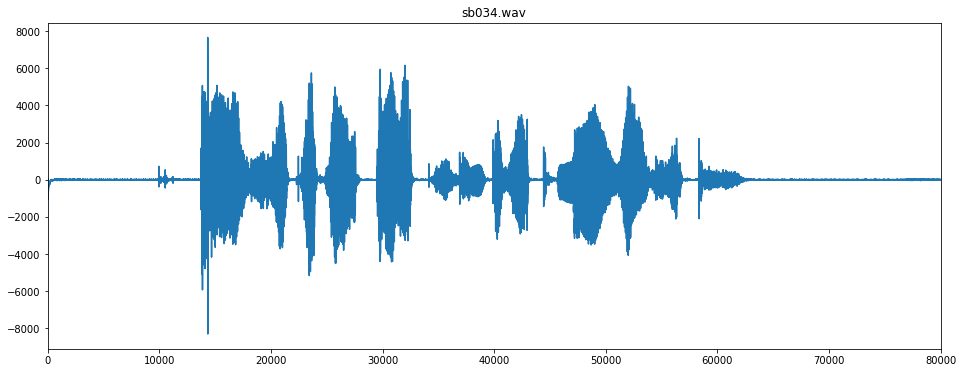

In [10]:
# Read and plot a speech file from the FDA_UE database
name = "sb034.wav"
filename="../data/fda_ue/" + name
sfreq, data = wavfile.read(filename)
plt.plot(data)
plt.xlim(0, len(data))
plt.title(name)

Text(0.5,1,'A frame')

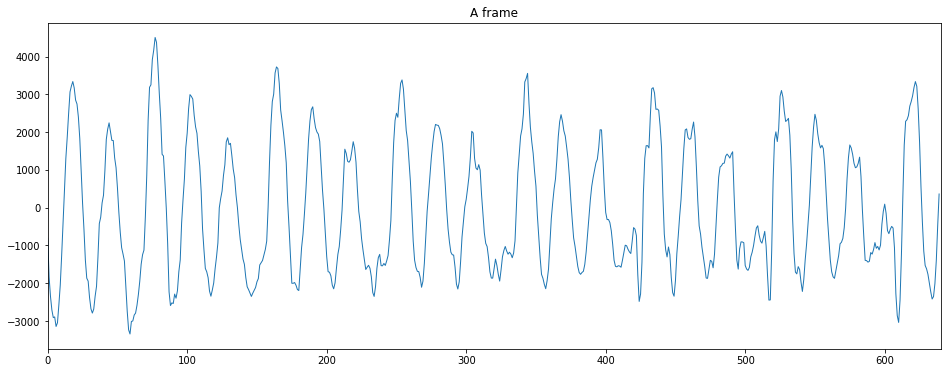

In [11]:
# Pick a short segment
windowlength = 32 # 32ms
ns_windowlength = int(round((windowlength * sfreq) / 1000))
pos = 31000
frame_length = ns_windowlength

frame = data[pos:pos+frame_length]

plt.plot(frame, linewidth=1.0)
plt.xlim(0, frame_length)
plt.title("A frame")

### Calculate the autocorrelation using [scipy.signal.correlate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) ###

Text(0.5,1,'The complete autocorrelation')

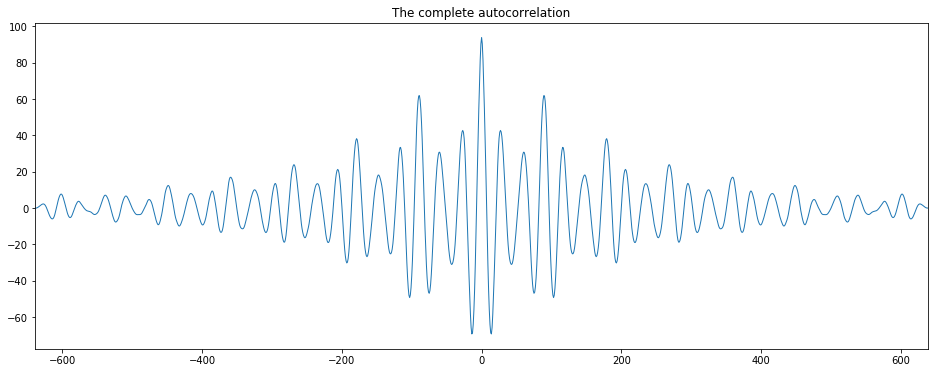

In [14]:
frame = frame.astype(np.float)
frame -= frame.mean()
amax = np.abs(frame).max()
frame /= amax
plt.xlim(-(frame_length-1), frame_length-1)
bcorr = correlate(frame, frame)
plt.plot(range(-(frame_length-1), frame_length), bcorr, linewidth=1.0)
plt.title("The complete autocorrelation")

Text(0.5,1,'The autocorrelation for nonnegative indexes')

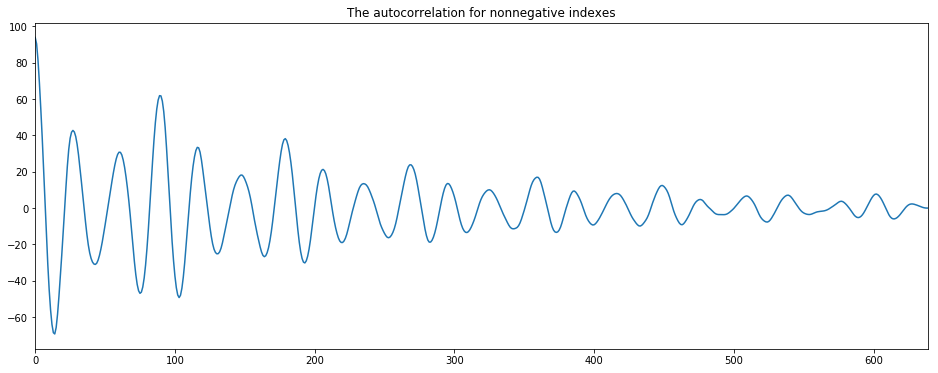

In [16]:
# keep the positive indexes of the autocorrelation
corr = bcorr[len(bcorr)//2:]
plt.xlim(0, frame_length-1)
plt.plot(corr)
plt.title("The autocorrelation for nonnegative indexes")

### Caculate the first difference using [numpy.diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) ###

Text(0.5,1,'The first difference of the autocorrelation (corr[n+1] - corr[n])')

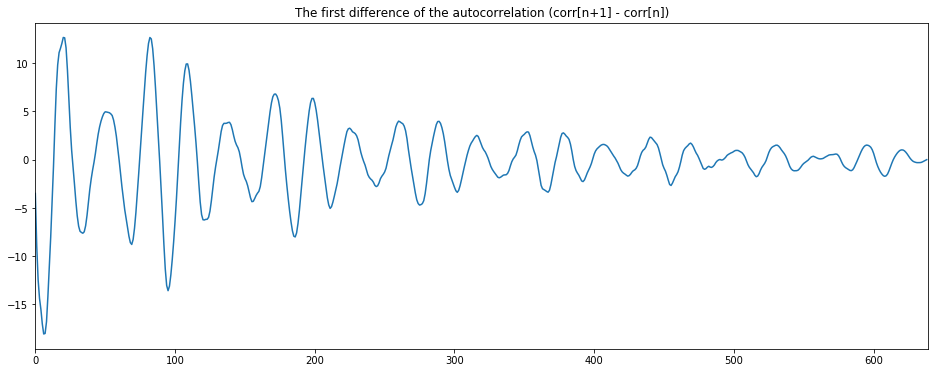

In [17]:
# Find the first minimum
dcorr = np.diff(corr)
plt.xlim(0, len(dcorr))
plt.plot(dcorr)
plt.title("The first difference of the autocorrelation (corr[n+1] - corr[n])")

### Find the index of the first sample with positive difference using [numpy.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) ###

Text(0.5,1,'Autocorrelation without the initial values up to the first minimum')

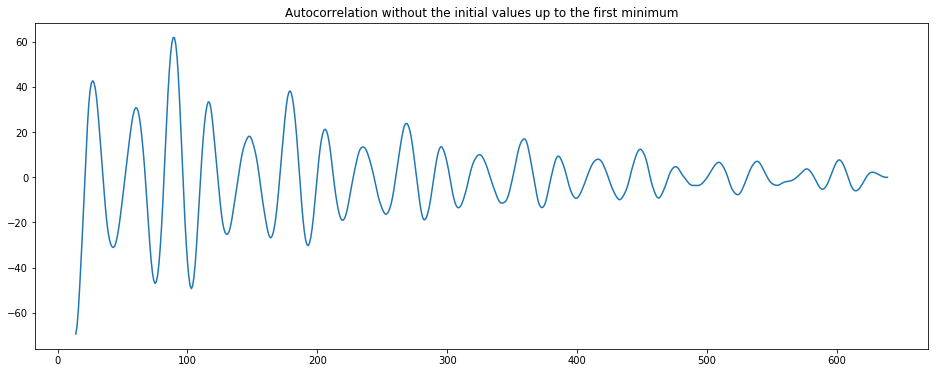

In [18]:
# Find the first minimum
rmin = np.where(dcorr > 0)[0]
if len(rmin) > 0:
    rmin1 = rmin[0]
plt.plot(range(rmin1,len(corr)), corr[rmin1:])
plt.title("Autocorrelation without the initial values up to the first minimum")

### Find the index of the sample with the maximum value using [numpy.argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) ###

In [19]:
# Find the next peak
peak = np.argmax(corr[rmin1:]) + rmin1
rmax = corr[peak]/corr[0]
f0 = sfreq / peak

In [20]:
print("corr[peak]/corr[0] = {:.1f}".format(rmax))
print("Pitch frequency = {:.1f} Hz".format(f0))
print("Pitch period {:.1f} ms ({:d} samples)".format((1/f0)*1000, peak))

corr[peak]/corr[0] = 0.7
Pitch frequency = 224.7 Hz
Pitch period 4.5 ms (89 samples)


### Calculate the magnitude difference function

Text(0.5,1,'The complete mdf')

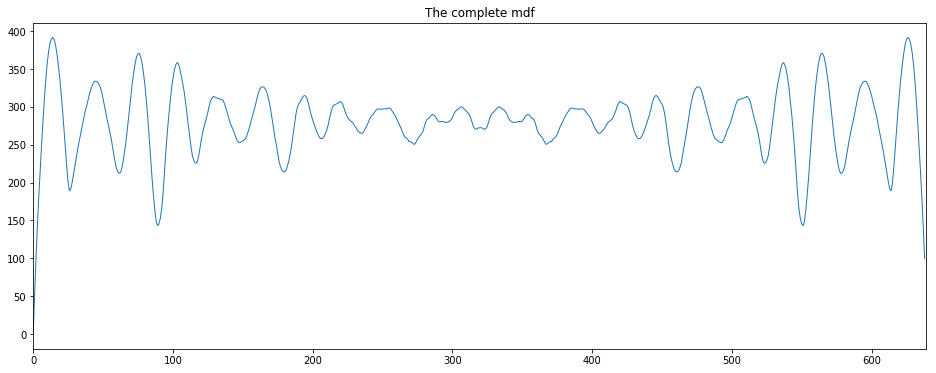

In [38]:
plt.xlim(-(frame_length-1), frame_length-1)

n = len(frame)
mdf = []
for k in range(0, n - 1):
    mdf.append(np.sum(np.absolute(frame - np.roll(frame, k))))
    
    
plt.plot(mdf, linewidth=1.0)
plt.xlim(0, len(mdf))
plt.title("The complete mdf")


In [43]:
print("We extract the minimum in the correct range")
print(20000 / np.min(mdf[int(20000 / 350):int(20000 / 100)]))

We extract the minimum in the correct range
139.82721237712434


### Calculate the cepstrum

215.05376344086022


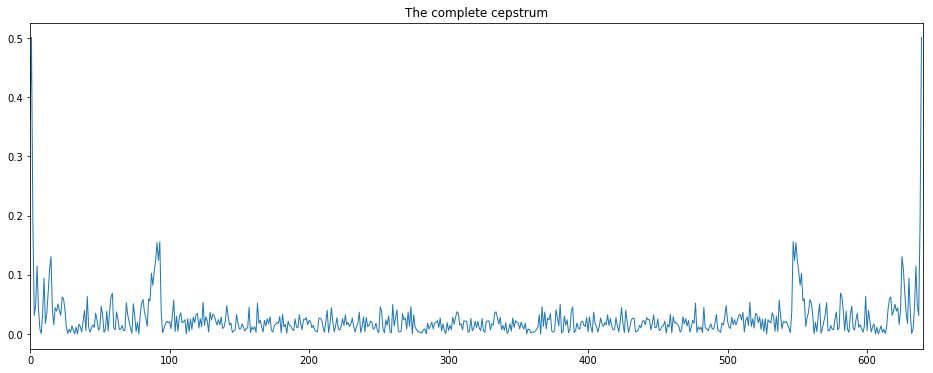

In [42]:
from scipy.signal import hamming

# Normalize the frame to -1 to 1
frame = frame/np.max(frame)
N = len(frame)
noise = (np.random.random_sample(N)-.5)*.05
frame = frame+noise

# Apply a window to the frame
windowed_frame = frame*hamming(N)
# Compute ceptrsum
cepstrum = np.abs(np.fft.irfft(np.log(np.abs(np.fft.rfft(windowed_frame)))))
start = int(N/12)
end = int(N/2)

plt.plot(cepstrum, linewidth=1.0)
plt.xlim(0, len(cepstrum))
plt.title("The complete cepstrum")

# Find the highest peak and interpolate to get a more accurate result
peak = np.argmax(cepstrum[start:end])

# Convert to the corresponding frequency
f0 = 20000/(start+peak)
print(f0)
    